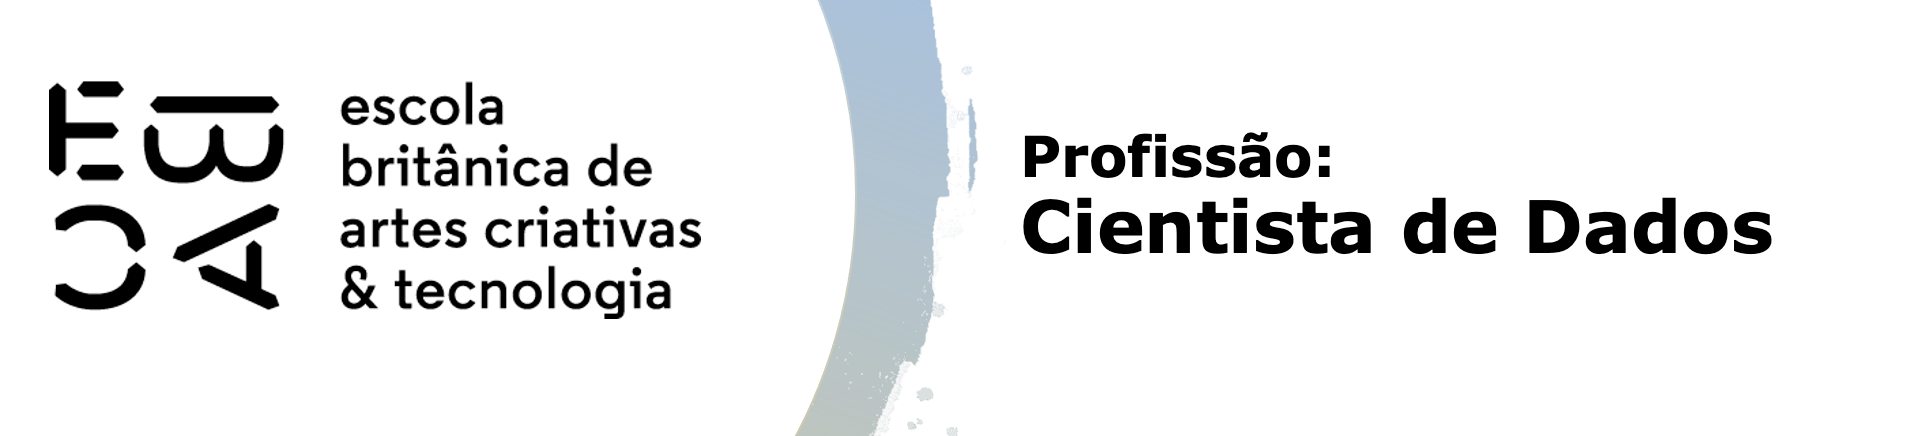

# Probabilidade - Tarefa

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
import matplotlib.ticker as mtick

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

- Cálculo da probabilidade

In [3]:
# média dos pacotes
media = 15

# desvio padrão
desvio = .1

# considera o limite inferior como o mínomo do peso que desejamos descobrir, no caso, pacotes com + de 15.2 Kg
# como queremos pacotes com mais (>) de 15.2 Kg, adicionei 0.001 para considerar a partir de 15.21 Kg
limite_inferior = 15.2 + 0.001

# como o enunciado não cita um limite superior (apenas > que 15.2) o limite superior será:
# limite inferior + 3 desvios
limite_superior = limite_inferior + (desvio * 3)

# cálculo da probabilidade
prob = stats.norm.cdf(limite_superior, media, desvio) - stats.norm.cdf(limite_inferior, media, desvio)

print(f'A probabilidade para valores entre {limite_inferior:.2f} e {limite_superior:.2f} é de {prob:.2%}'.replace('.',','))

A probabilidade para valores entre 15,20 e 15,50 é de 2,22%


- Gráfico

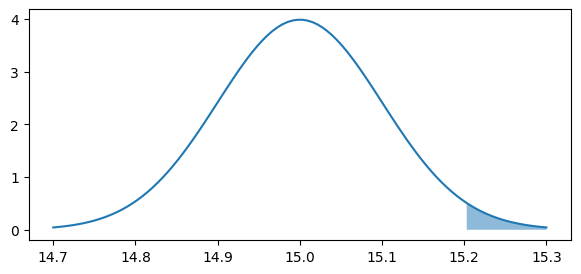

In [4]:
# gráfico para demonstrar a lógica do cálculo anterior

fig, ax = plt.subplots(1, 1, figsize=(7,3))

pesos = np.linspace(media - 3 * desvio, media + 3 * desvio, 100)
y = stats.norm.pdf(pesos, media, desvio)
ax.plot(pesos, y)

_ = ax.fill_between(pesos, y, where=(limite_inferior < pesos) & (pesos < limite_superior), alpha=.5)

2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

In [5]:
# calcula a probabilidade dos pesos, que foram gerados considerando 3 vezes o desvio padrão
p = stats.norm.cdf(pesos, media, desvio)

# função de ponto percentual (inverso de cdf - percentis)
pesos_percentis = stats.norm.ppf(p[p < .95], media, desvio)

pesos_percentis = pesos_percentis[-1]

print(f'Valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%: {pesos_percentis:.2f}')

Valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%: 15.16


3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [6]:
Y=np.linspace(-6, 6, 200)
# Seu código começa aqui

mu = 0
variance = 1
gl = 5

# variância
sigma = math.sqrt(variance)

# Probabilidades para Y1
p_y1 = stats.norm.cdf(Y, mu, sigma)

# Probabilidades para Y2
p_y2 = stats.t.cdf(Y, gl)

4. Faça uma visualização gráfica dos dados do item anterior.

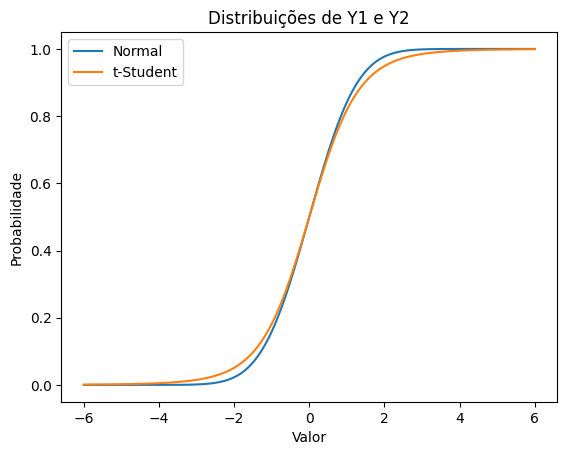

In [7]:
# Plotando a distribuição normal padrão
plt.plot(Y, p_y1, label="Normal")

# Plotando a distribuição t-Student
plt.plot(Y, p_y2, label="t-Student")

# Personalizando o gráfico
plt.xlabel("Valor")
plt.ylabel("Probabilidade")
plt.title("Distribuições de Y1 e Y2")
plt.legend()
plt.show()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [8]:
Y=np.linspace(0, 1, 20)
# Seu código começa aqui


# Percentis para Y1
percentis_y1 = stats.norm.ppf(Y, mu, sigma)

# Percentis para Y2
percentis_y2 = stats.t.ppf(Y, gl)

6. Faça um gráfico com os dados do item anterior.

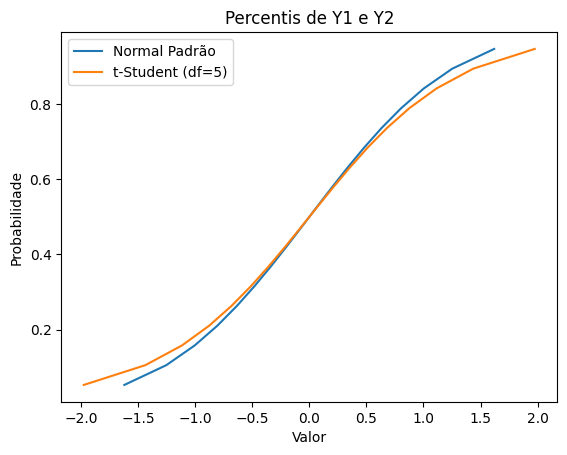

In [9]:
# Plotando os percentis
plt.plot(percentis_y1, Y, label="Normal Padrão")
plt.plot(percentis_y2, Y, label="t-Student (df=5)")

# Personalizando o gráfico
plt.ylabel("Probabilidade")
plt.xlabel("Valor")
plt.title("Percentis de Y1 e Y2")
plt.legend()
plt.show()